# Introduction to Exploratory Data Analysis
In this notebook, we gonna learn how we can perform exploratory data analysis on a given dataset.

## Step 1: Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns


plt.style.use('ggplot')
#pd.set_option('max_columns', 200)

## Step 2: Loading Data

In [3]:
df = pd.read_csv('./coaster_db.csv')

## Step 3: Data Understanding
We need to first grasp the fundamental understanding of the data. Such as 
- Dataset shape
- Dataset head and tail
- Dataset type dtypes
- Dataset Description


In [4]:
df.shape # shape of dataframe

(1087, 57)

In [5]:
df.head(5) # Top-5 rows from dataframe

,Unnamed: 0,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [6]:
df.columns # listing all columns of the dataframe

Index(['Unnamed: 0', 'coaster_name', 'Length', 'Speed', 'Location', 'Status',
       'Opening date', 'Type', 'Manufacturer', 'Height restriction', 'Model',
       'Height', 'Inversions', 'Lift/launch system', 'Cost', 'Trains',
       'Park section', 'Duration', 'Capacity', 'G-force', 'Designer',
       'Max vertical angle', 'Drop', 'Soft opening date',
       'Fast Lane available', 'Replaced', 'Track layout', 'Fastrack available',
       'Soft opening date.1', 'Closing date', 'Opened', 'Replaced by',
       'Website', 'Flash Pass Available', 'Must transfer from wheelchair',
       'Theme', 'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [7]:
df.dtypes # list datatypes of each column

Unnamed: 0                         int64
coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane availa

In [8]:
df.describe() #statistical description

,Unnamed: 0,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,1087.000000,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,543.000000,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,313.934176,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,271.500000,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,543.000000,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,814.500000,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,1086.000000,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


## Step 4: Data Preperation
Before start to anaylze the data, we have to make sure that the data is cleaned. Following steps will be performed during data preparation.
- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaming Columns
- Feature Creation

In [9]:
# Example of dropping columns
# df.drop(['Opening date'], axis=1)

In [10]:
# removing columns
df = df[['coaster_name',
    # 'Length', 'Speed',
    'Location', 'Status',
    # 'Opening date',
    #   'Type',
    'Manufacturer',
#     'Height restriction', 'Model', 'Height',
#        'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
#        'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
#        'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
#        'Track layout', 'Fastrack available', 'Soft opening date.1',
#        'Closing date',
#     'Opened', 
    # 'Replaced by', 'Website',
#        'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
#        'Single rider line available', 'Restraint Style',
#        'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced',
        'latitude', 'longitude',
    'Type_Main',
       'opening_date_clean',
    #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
    #'height_value', 'height_unit',
    'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

In [11]:
df.head(5)

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [12]:
# converting the string date to a datetime date
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean']) 

In [13]:
# Rename our columns
df = df.rename(columns={'coaster_name':'Coaster_Name',
                   'year_introduced':'Year_Introduced',
                   'opening_date_clean':'Opening_Date',
                   'speed_mph':'Speed_mph',
                   'height_ft':'Height_ft',
                   'Inversions_clean':'Inversions',
                   'Gforce_clean':'Gforce'})

In [14]:
# Shows which column have how many null values?
df.isna().sum()

Coaster_Name         0
Location             0
Status             213
Manufacturer        59
Year_Introduced      0
latitude           275
longitude          275
Type_Main            0
Opening_Date       250
Speed_mph          150
Height_ft          916
Inversions           0
Gforce             725
dtype: int64

In [23]:
# Show duplicate rows: it only return rows which have all duplicate column values.
df.loc[df.duplicated()]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce


In [22]:
# Check for duplicate coaster name: It show rows that have duplicate coaster name.
df.loc[df.duplicated(subset=['Coaster_Name'])]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaT,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7


In [24]:
# Checking an example duplicate
df.query('Coaster_Name == "Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [25]:
df.columns

Index(['Coaster_Name', 'Location', 'Status', 'Manufacturer', 'Year_Introduced',
       'latitude', 'longitude', 'Type_Main', 'Opening_Date', 'Speed_mph',
       'Height_ft', 'Inversions', 'Gforce'],
      dtype='object')

In [29]:
df.duplicated(subset=['Coaster_Name', 'Location', 'Opening_Date']).sum()

97

In [30]:
# select just columns that are not the duplicate so just the first version.
# reset index is done in order to put index value in order
df = df.loc[~df.duplicated(subset=['Coaster_Name','Location','Opening_Date'])] \
    .reset_index(drop=True).copy()

In [31]:
df.head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [32]:
df.shape

(990, 13)

In [35]:
# we removed all rows that contains nan value.
# another better approach would be replacing the nan values with some other values
df = df.dropna().reset_index(drop=True).copy()
df.head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,Python (Efteling),Efteling,Operating,Vekoma,1981,51.6469,5.0536,Steel,1981-04-12,46.6,95.1,4,3.5
1,Mindbender (Galaxyland),Galaxyland,closed for maintenance as of july 30 no reopen...,Anton Schwarzkopf,1985,53.5236,-113.6203,Steel,1985-12-20,60.0,145.0,3,5.2
2,Lisebergbanan,Liseberg,Operating,Zierer,1987,57.6950,11.9925,Steel,1987-04-18,49.7,147.6,0,3.0
3,Goudurix,Parc Astérix,Operating,Vekoma,1989,49.1314,2.5714,Steel,1989-01-01,55.9,118.1,7,3.9
4,Condor (roller coaster),Walibi Holland,Operating,Vekoma,1994,52.4404,5.7615,Steel,1994-05-01,49.7,101.7,5,4.5


In [36]:
df.shape

(60, 13)

# Step 5: Feature Understanding
Univariate analysis: Looking each feature individually.
- Plotting Feature Distributions
    - Histogram
    - KDE
    - Boxplot

In [37]:
df['Year_Introduced'].value_counts()

Year_Introduced
2002    5
2014    4
2012    4
2009    4
2008    4
2011    4
1994    3
2004    3
2013    3
2007    3
2016    2
1998    2
1995    2
2003    2
2010    2
2005    2
2015    1
2017    1
2019    1
1981    1
1985    1
2001    1
2000    1
1997    1
1989    1
1987    1
2020    1
Name: count, dtype: int64

Text(0, 0.5, 'Count')

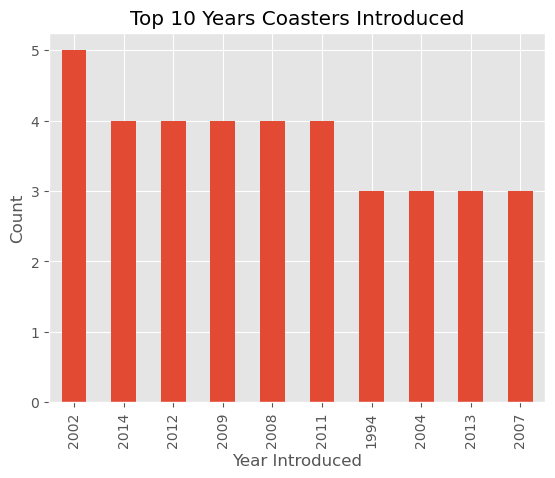

In [38]:
ax = df['Year_Introduced'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 Years Coasters Introduced')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count')

Text(0.5, 0, 'Speed (mph)')

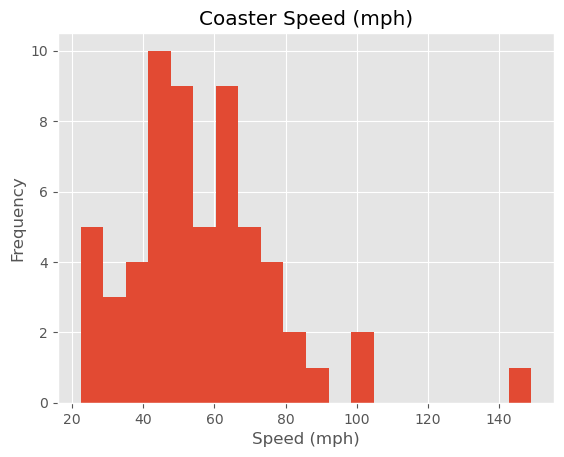

In [39]:
# for continuous value like speed it would be better to plot the histogram to get better idea of distribution.
ax = df['Speed_mph'].plot(kind='hist',
                          bins=20,
                          title='Coaster Speed (mph)')
ax.set_xlabel('Speed (mph)')

Text(0.5, 0, 'Speed (mph)')

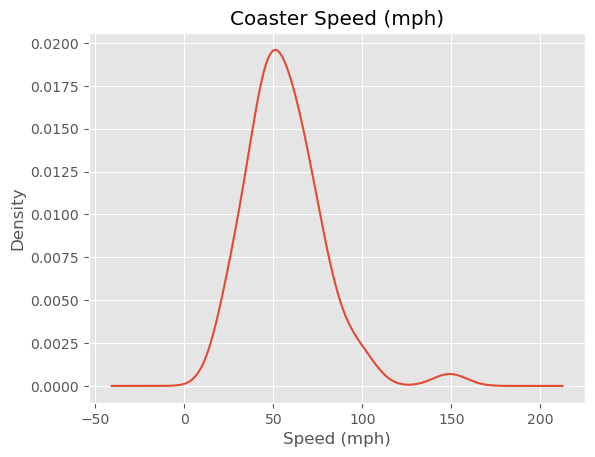

In [40]:
ax = df['Speed_mph'].plot(kind='kde',
                          title='Coaster Speed (mph)')
ax.set_xlabel('Speed (mph)')

In [41]:
df['Type_Main'].value_counts()

Type_Main
Steel    56
Wood      2
Other     2
Name: count, dtype: int64

## Step 6: Feature Relationships
In this step, we gonna see the relationship between features.
- Scatterplot
- Heatmap Correlation
- Pairplot
- Groupby comparisons

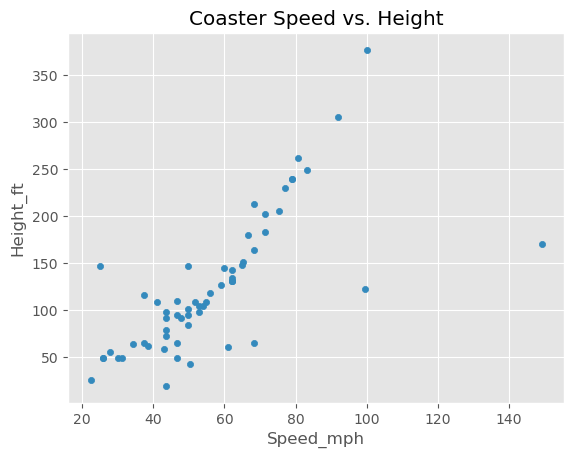

In [42]:
df.plot(kind='scatter',
        x='Speed_mph',
        y='Height_ft',
        title='Coaster Speed vs. Height')
plt.show()

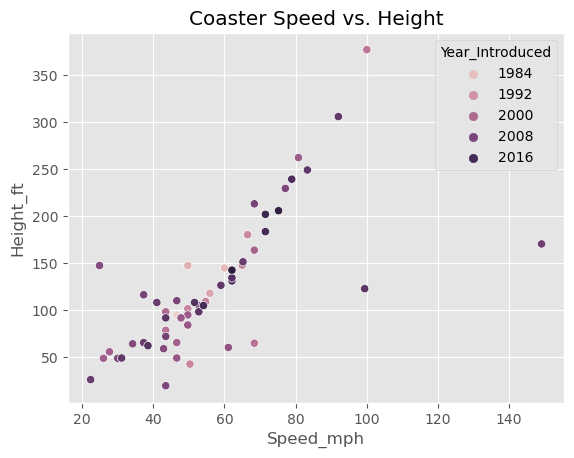

In [43]:
ax = sns.scatterplot(x='Speed_mph',
                y='Height_ft',
                hue='Year_Introduced',
                data=df)
ax.set_title('Coaster Speed vs. Height')
plt.show()

/home/surajkarki/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


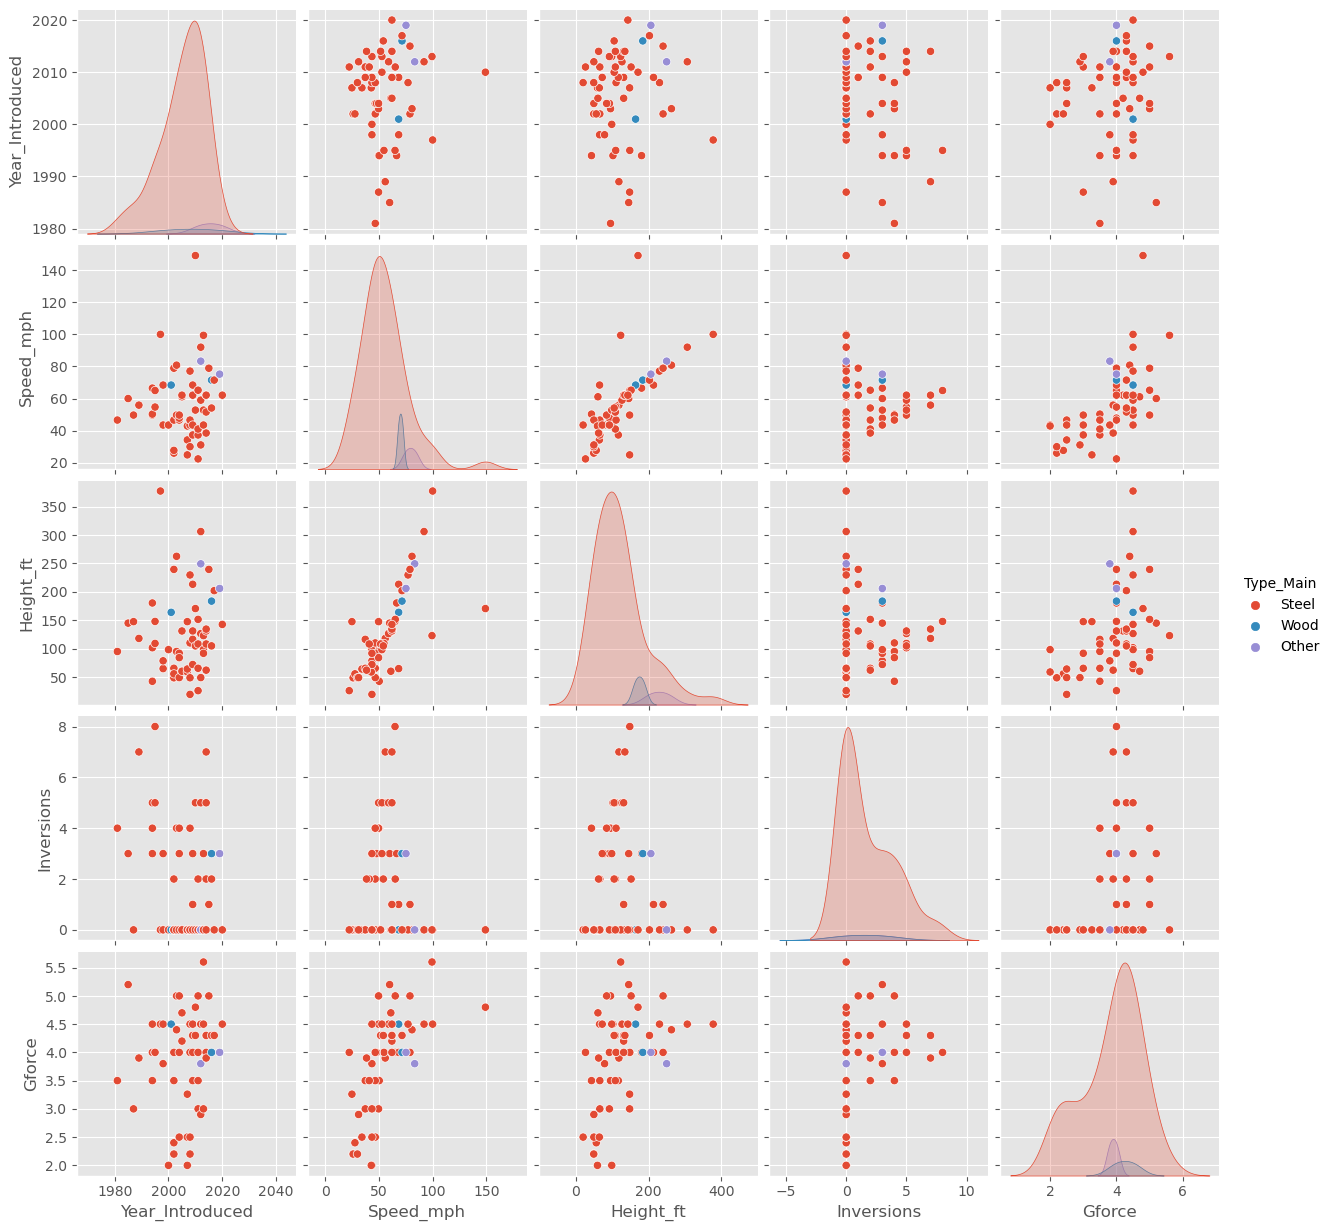

In [44]:
sns.pairplot(df,
             vars=['Year_Introduced','Speed_mph',
                   'Height_ft','Inversions','Gforce'],
            hue='Type_Main')
plt.show()

In [45]:
# Showing correlation between features
df_corr = df[['Year_Introduced','Speed_mph',
    'Height_ft','Inversions','Gforce']].corr()
df_corr

,Year_Introduced,Speed_mph,Height_ft,Inversions,Gforce
Year_Introduced,1.000000,0.113510,0.082382,-0.252572,0.120494
Speed_mph,0.113510,1.000000,0.717000,-0.031512,0.613343
Height_ft,0.082382,0.717000,1.000000,-0.079763,0.451928
Inversions,-0.252572,-0.031512,-0.079763,1.000000,0.294836
Gforce,0.120494,0.613343,0.451928,0.294836,1.000000


<Axes: >

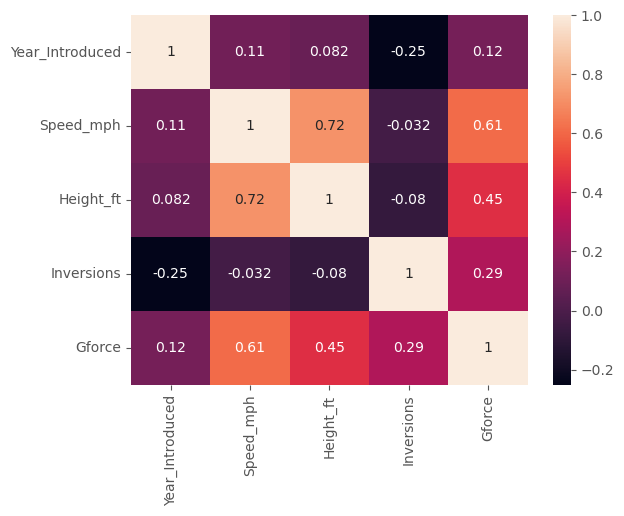

In [46]:
sns.heatmap(df_corr, annot=True)

## Step 7: Ask a Question about the data
Tough step
- Try to answer a question you have about the data using a plot or statistic.

What are the locations with the fastest roller coasters?

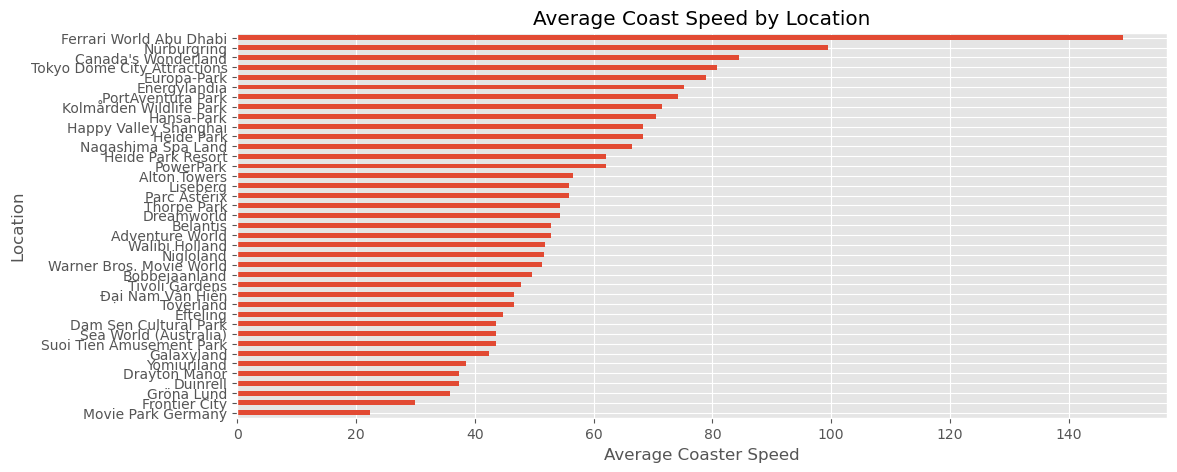

In [71]:
ax = df.query('Location != "Other"') \
    .groupby('Location')['Speed_mph'] \
    .agg(['mean','count']) \
    .sort_values('mean')['mean'] \
    .plot(kind='barh', figsize=(12, 5), title='Average Coast Speed by Location')
ax.set_xlabel('Average Coaster Speed')
plt.show()